In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wandb

In [2]:
api = wandb.Api()

runs = api.runs("jschuetzke/synthetic-benchmark")
summary = {}
for run in runs:
    if run.config["evaluation"] == "general":
        # run.name is the name of the run
        sum_dict = run.summary
        sum_dict['model_type'] = run.config['model_type']
        sum_dict['seed'] = run.config['seed']
        # filter metrics starting with underscore char (_)
        summary[run.name] = {key: value for key, value in sum_dict.items() if not key.startswith('_')}

In [3]:
df = pd.DataFrame.from_dict(summary, orient='index').reset_index(names='Name')[::-1]

In [4]:
df.head()

,Name,accuracy,lr,loss,epoch,val_accuracy,best_val_loss,wrong_class,best_accuracy,best_val_accuracy,val_loss,best_epoch,GFLOPS,model_type,seed
39,cnn2-0,0.99772,3.000000e-08,0.006313,79,0.9910,0.024204,34,0.99740,0.9910,0.024437,62,0.069968,cnn2,0
38,cnn2-1,0.99748,3.000000e-07,0.006891,62,0.9892,0.026159,39,0.99608,0.9904,0.027634,37,0.069968,cnn2,1
37,cnn2-2,0.99908,3.000000e-07,0.002668,73,0.9930,0.021190,31,0.99820,0.9934,0.021911,48,0.069968,cnn2,2
36,cnn2-3,0.99848,3.000000e-07,0.004341,73,0.9904,0.029063,50,0.99788,0.9902,0.030290,48,0.069968,cnn2,3
35,cnn2-4,0.99732,3.000000e-07,0.006478,65,0.9900,0.026525,36,0.99600,0.9894,0.027101,40,0.069968,cnn2,4


In [5]:
df[['model_type','wrong_class','best_epoch']].groupby('model_type').agg(['max','min','mean'])

wrong_class           best_epoch          
                   max min  mean        max min  mean
model_type                                           
cnn2                50  31  38.0         62  37  47.0
cnn3                34  25  28.4         60  34  48.6
cnn6                12   6   8.4         94  62  71.6
cnn_bn              50  33  44.2         54  24  37.2
inc3                20  12  17.2         45  28  34.4
inc6                13  10  11.4         44  25  35.2
resnet              22  20  21.2         27  19  23.4
vgg                 31  16  21.6        134  59  83.8

In [6]:
df[['Name','model_type','best_accuracy','wrong_class']].groupby('model_type').head()

,Name,model_type,best_accuracy,wrong_class
39,cnn2-0,cnn2,0.99740,34
38,cnn2-1,cnn2,0.99608,39
37,cnn2-2,cnn2,0.99820,31
36,cnn2-3,cnn2,0.99788,50
35,cnn2-4,cnn2,0.99600,36
34,cnn3-0,cnn3,0.99660,34
33,cnn3-1,cnn3,0.99864,27
32,cnn3-2,cnn3,0.99888,31
31,cnn3-3,cnn3,0.99848,25
30,cnn3-4,cnn3,0.99656,25


In [7]:
df[['Name','model_type','best_accuracy','wrong_class']].sort_values('wrong_class').groupby('model_type').first()

,Name,best_accuracy,wrong_class
model_type,,,
cnn2,cnn2-2,0.99820,31
cnn3,cnn3-4,0.99656,25
cnn6,cnn6-0,0.99500,6
cnn_bn,cnn_bn-1,0.99864,33
inc3,inc3-0,0.99844,12
inc6,inc6-1,0.99840,10
resnet,resnet-2,0.99884,20
vgg,vgg-3,0.99700,16


### Calculate train data misclassifications

In [8]:
n_total = 50*500
percentages = np.array([(n_total-f)/n_total for f in range(1000)])
accs = df['best_accuracy'].values

In [9]:
accs

array([0.99739999, 0.99607998, 0.9982    , 0.99787998, 0.99599999,
       0.99659997, 0.99864   , 0.99888003, 0.99848002, 0.99655998,
       0.995     , 0.99316001, 0.99335998, 0.99379998, 0.99260002,
       0.99708003, 0.99760002, 0.99739999, 0.99699998, 0.99672002,
       0.99848002, 0.99892002, 0.99883997, 0.99860001, 0.99892002,
       0.99752003, 0.99864   , 0.99739999, 0.99915999, 0.99856001,
       0.99844003, 0.99848002, 0.99676001, 0.99835998, 0.99668002,
       0.99795997, 0.99839997, 0.99739999, 0.99791998, 0.99808002])

In [10]:
df['miscl_train'] = np.argmin(np.abs(accs[:,None] - percentages[None,:]), axis=1)

### Calculate val data misclassifications

In [11]:
n_total = 10*500
percentages = np.array([(n_total-f)/n_total for f in range(1000)])
accs = df['best_val_accuracy'].values

In [12]:
accs

array([0.991     , 0.99040002, 0.99339998, 0.99019998, 0.98940003,
       0.99599999, 0.99379998, 0.995     , 0.99519998, 0.99559999,
       0.99760002, 0.99839997, 0.99779999, 0.99800003, 0.99760002,
       0.99379998, 0.99360001, 0.99379998, 0.99360001, 0.9946    ,
       0.99540001, 0.99620003, 0.99620003, 0.99599999, 0.99599999,
       0.99440002, 0.99379998, 0.99419999, 0.99260002, 0.99419999,
       0.99599999, 0.9964    , 0.99479997, 0.99559999, 0.99620003,
       0.99739999, 0.99699998, 0.99720001, 0.9964    , 0.99680001])

In [13]:
df['miscl_val'] = np.argmin(np.abs(accs[:,None] - percentages[None,:]), axis=1)

### Generate full training info table

In [14]:
full = df[['model_type','seed','best_accuracy','miscl_train',
           'best_val_accuracy','miscl_val','wrong_class']].copy()
full['test_accuracy'] = 1 - (full['wrong_class'] / (9*500))

full[['model_type','seed','best_accuracy','miscl_train',
      'best_val_accuracy','miscl_val',
      'test_accuracy','wrong_class']].to_latex(index=False, float_format="{:0.3%}".format)#.replace('\\\\','\\')

### Actual Figures

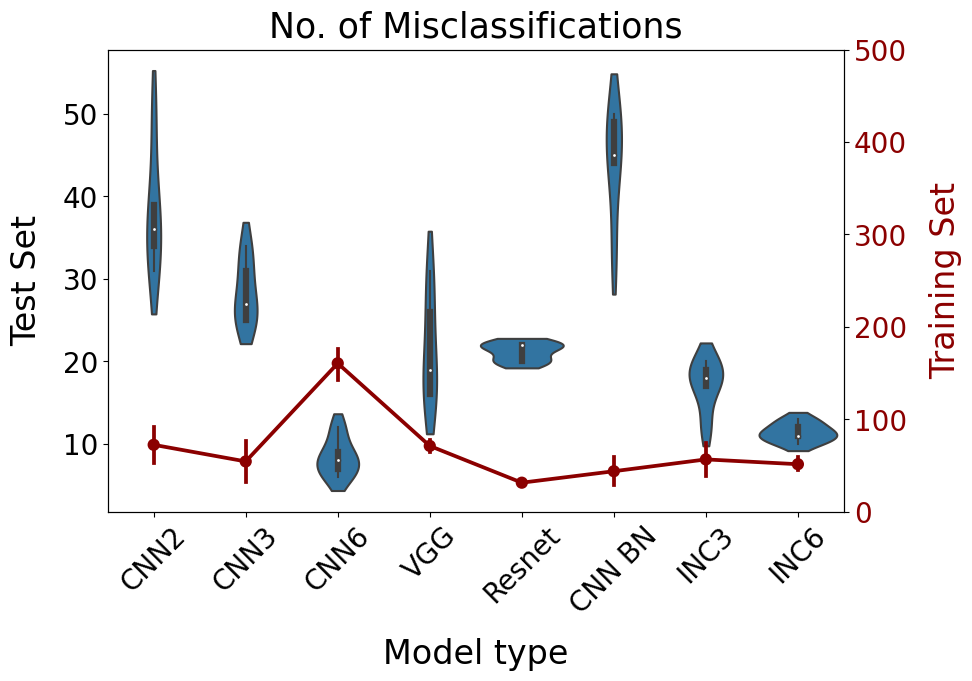

In [15]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'ps.fonttype': 42})

plt.figure(figsize=(9.5, 6))
ax = plt.gca()
sns.violinplot(x='model_type', y='wrong_class', data=df, ax=ax, color=sns.color_palette()[0], cut=0.99, width=0.9)
ax1 = ax.twinx()
#sns.lineplot(x='model_type', y='miscl_train', color='darkred', data=df, ax=ax1)
sns.pointplot(x='model_type', y='miscl_train', color='darkred', data=df, ax=ax1)
ax1.set_ylim(0,500)
ax.set_ylabel('Test Set', fontsize=24, labelpad=14)
ax1.set_yticks([0,100,200,300,400,500], [0,100,200,300,400,500], color='darkred')
ax1.set_ylabel('Training Set', fontsize=24, color='darkred', labelpad=16)
plt.xticks(np.arange(8),['CNN2','CNN3','CNN6','VGG','Resnet','CNN BN', 'INC3', 'INC6'], fontsize=24, rotation=45)
ax.tick_params(axis='x', labelsize=20, rotation=45)
ax.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Model type', fontsize=24, labelpad=14)
plt.title('No. of Misclassifications', fontsize=25, y=1.01)
#plt.savefig('../figures/misclassifications.eps', bbox_inches='tight')
plt.show()

### Visualize the training progress for select networks

In [16]:
history = {}
for run in runs:
    if run.config["evaluation"] == "general" and run.config["model_type"] in ['resnet','cnn2', 'cnn_bn']:
        # run.name is the name of the run
        history[run.name] = run.history()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


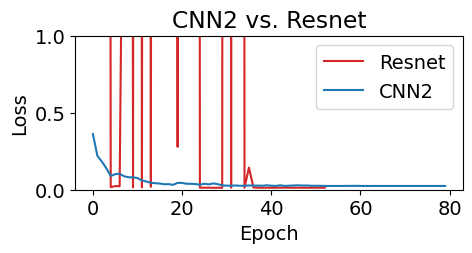

In [17]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'ps.fonttype': 42})

plt.figure(figsize=(5,2))
plt.plot(history['resnet-1']['val_loss'].values, c='C3', label='Resnet')
plt.plot(history['cnn2-0']['val_loss'].values, c='C0', label='CNN2')
plt.ylim(0,1.)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN2 vs. Resnet')
#plt.savefig('../figures/loss_cnn2_resnet.eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


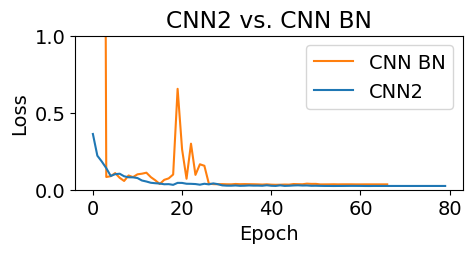

In [18]:
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'ps.fonttype': 42})

plt.figure(figsize=(5,2))
plt.plot(history['cnn_bn-1']['val_loss'].values, c='C1', label='CNN BN')
plt.plot(history['cnn2-0']['val_loss'].values, c='C0', label='CNN2')
plt.ylim(0,1.)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN2 vs. CNN BN')
#plt.savefig('../figures/loss_cnn2_cnnbn.eps', bbox_inches='tight')
plt.show()